In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Introduce missing values artificially for lab experiments
df.loc[5:10, 'sepal length (cm)'] = np.nan
df.loc[15:20, 'species'] = np.nan

In [ ]:
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
sepal length (cm)    6
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              6
dtype: int64


In [ ]:
before_rows = df.shape[0]
df_dropna = df.dropna()
after_rows = df_dropna.shape[0]

print("Rows before cleaning:", before_rows)
print("Rows after cleaning:", after_rows)

Rows before cleaning: 150
Rows after cleaning: 138


In [ ]:
df_filled = df.copy()

# Numerical: replace with mean
df_filled['sepal length (cm)'].fillna(
    df_filled['sepal length (cm)'].mean(), inplace=True
)

# Categorical: replace with constant
df_filled['species'].fillna('unknown', inplace=True)

print(df_filled.isnull().sum())

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


C:\Users\rohit\AppData\Local\Temp\ipykernel_31456\842682534.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filled['sepal length (cm)'].fillna(
C:\Users\rohit\AppData\Local\Temp\ipykernel_31456\842682534.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when d

In [ ]:
print("Before conversion:")
print(df_filled.dtypes)

# Convert sepal width to integer
df_filled['sepal width (cm)'] = df_filled['sepal width (cm)'].astype(int)

print("\nAfter conversion:")
print(df_filled.dtypes)

Before conversion:
sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
species               object
dtype: object

After conversion:
sepal length (cm)    float64
sepal width (cm)       int64
petal length (cm)    float64
petal width (cm)     float64
species               object
dtype: object


In [6]:
df_renamed = df_filled.rename(columns={
    'sepal length (cm)': 'sepal_length',
    'sepal width (cm)': 'sepal_width',
    'petal length (cm)': 'petal_length',
    'petal width (cm)': 'petal_width'
})

print(df_renamed.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1            3           1.4          0.2  setosa
1           4.9            3           1.4          0.2  setosa
2           4.7            3           1.3          0.2  setosa
3           4.6            3           1.5          0.2  setosa
4           5.0            3           1.4          0.2  setosa


In [7]:
# Introduce inconsistency
df_renamed.loc[0, 'species'] = 'Setosa'

# Standardize values
df_renamed['species'] = df_renamed['species'].str.lower()

print(df_renamed['species'].unique())


['setosa' 'unknown' 'versicolor' 'virginica']


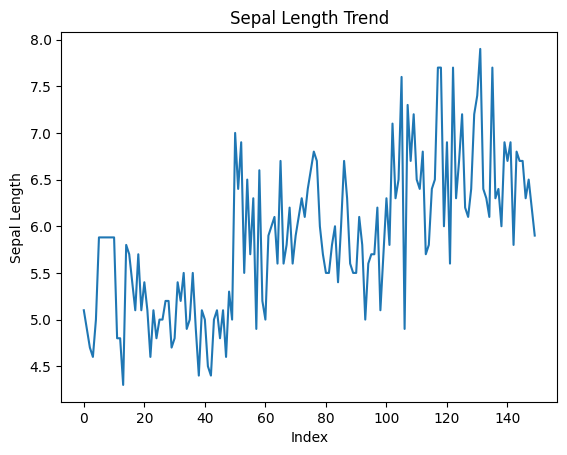

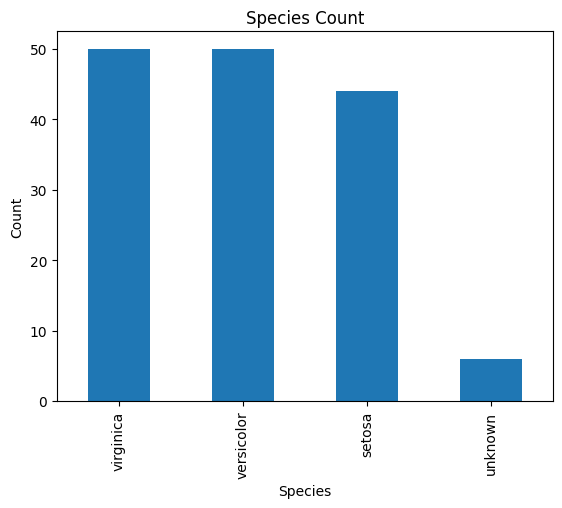

In [ ]:
# Line plot (sepal length trend)
plt.plot(df_renamed['sepal_length'])
plt.title("Sepal Length Trend")
plt.xlabel("Index")
plt.ylabel("Sepal Length")
plt.show()

# Bar plot (species count)
df_renamed['species'].value_counts().plot(kind='bar')
plt.title("Species Count")
plt.xlabel("Species")
plt.ylabel("Count")
plt.show()

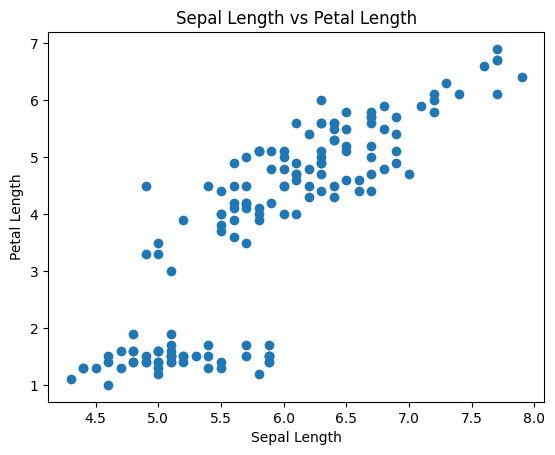

In [ ]:
plt.scatter(df_renamed['sepal_length'], df_renamed['petal_length'])
plt.title("Sepal Length vs Petal Length")
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.show()

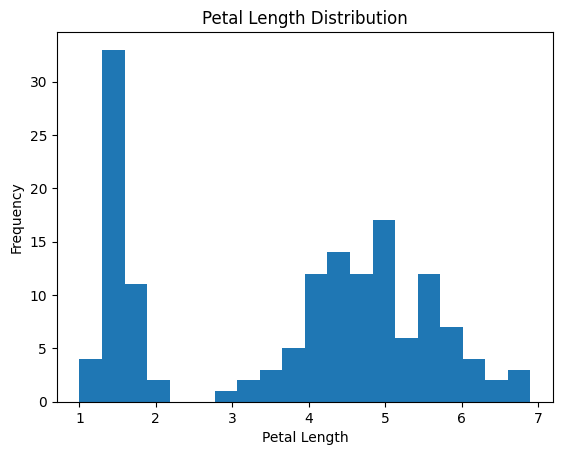

In [ ]:
plt.hist(df_renamed['petal_length'], bins=20)
plt.title("Petal Length Distribution")
plt.xlabel("Petal Length")
plt.ylabel("Frequency")
plt.show()

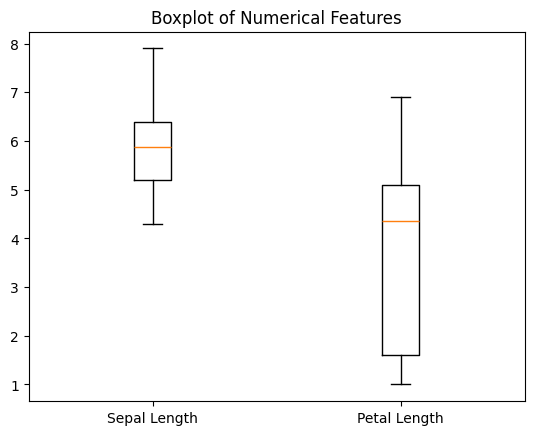

In [11]:
plt.boxplot(df_renamed[['sepal_length', 'petal_length']])
plt.xticks([1, 2], ['Sepal Length', 'Petal Length'])
plt.title("Boxplot of Numerical Features")
plt.show()